# Task 4.9

### Import Data and Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path to folder
path = r'/Users/caitlin/Documents 2/Instacart Basket Analysis 12.2021'

In [3]:
# Check path

path

'/Users/caitlin/Documents 2/Instacart Basket Analysis 12.2021'

In [4]:
# Import data file
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_grouped.pkl'))

### Create Bar Chart

<AxesSubplot:>

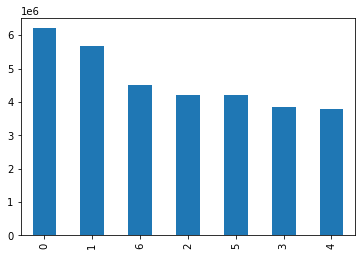

In [5]:
# Create bar chart using matplotlib
ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

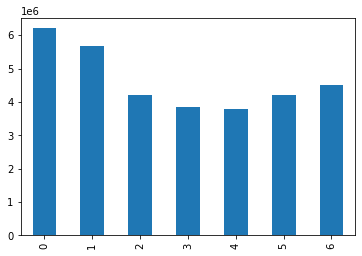

In [6]:
# Create bar chart using sort index - so it is not no ordered largest to smallest
ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

Frequencies can also use the sort index function:

In [7]:
# Frequencies without sort index
ords_prods_merged['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [8]:
# Frequencies with sort index
ords_prods_merged['orders_day_of_week'].value_counts(dropna = False).sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

Change color on bar chart:

<AxesSubplot:>

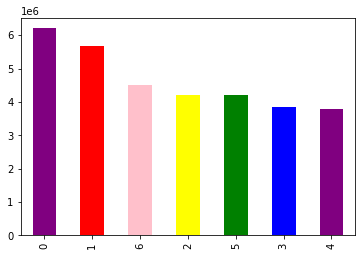

In [9]:
# Create bar chart with color
ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'yellow' ,'green', 'blue'])

### Exporting Charts

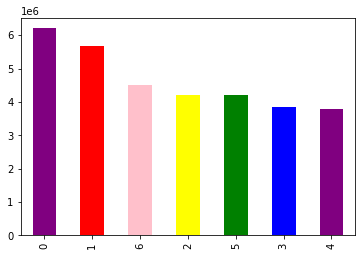

In [10]:
# Save bar chart as bar object
bar = ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'yellow' ,'green', 'blue'])

In [11]:
# Export bar outside Jupyter
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Creating Histograms and Scatterplots

#### Histograms

<AxesSubplot:ylabel='Frequency'>

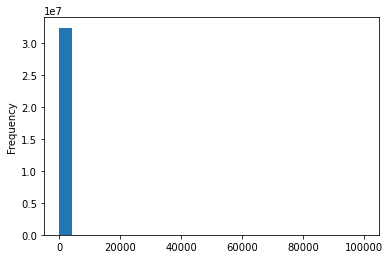

In [12]:
# Create histogram from prices
ords_prods_merged['prices'].plot.hist(bins = 25)

The above is not correct. There should be 25 bins, so further investigation is needed.

In [13]:
# Check data using describe function
ords_prods_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
# Check mean, median, max
ords_prods_merged['prices'].mean()

11.980225638467232

In [15]:
ords_prods_merged['prices'].median()

7.4

In [16]:
ords_prods_merged['prices'].max()

99999.0

#### Scatterplots

Normally scatterplots are used to examine two variables, but it can also be used in exploratory analysis.

<AxesSubplot:xlabel='prices', ylabel='prices'>

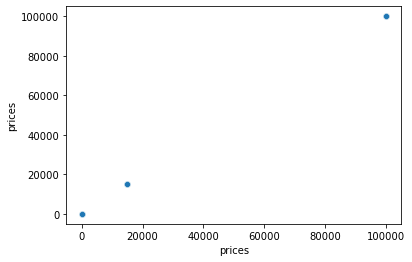

In [17]:
# Create scatterplot for exploratory analysis
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

Checking the outlier values:

In [18]:
# Check outlier values
ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spender_type,order_avg,median_order,customer_frequency,median_days_prior_order
10030345,171,912404,17,prior,12,2,14,5.0,False,21553,...,Regularly busy,Regularly busy,Busiest Times,40,Regular Customer,High Spender,108.648299,5.0,Frequent Customer,5.0
10030346,181,603376,17,prior,22,6,16,4.0,False,21553,...,Regularly busy,Regularly busy,Busiest Times,40,Regular Customer,High Spender,108.648299,5.0,Frequent Customer,5.0
10030347,1944,3264360,135,prior,2,2,21,13.0,False,21553,...,Regularly busy,Regularly busy,Moderate Times,4,New Customer,High Spender,1154.792308,12.0,Regular Customer,12.0
10030348,1945,892534,135,prior,3,0,8,12.0,False,21553,...,Busiest day,Busiest days,Busiest Times,4,New Customer,High Spender,1154.792308,12.0,Regular Customer,12.0
10030349,5708,229704,342,prior,8,1,19,30.0,False,21553,...,Regularly busy,Busiest days,Busiest Times,16,Regular Customer,High Spender,114.426619,23.0,Non-Frequent Customer,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,2249946,204099,prior,29,0,8,4.0,False,33664,...,Busiest day,Busiest days,Busiest Times,39,Regular Customer,High Spender,1106.743956,4.0,Frequent Customer,4.0
29166210,3386544,2363282,204099,prior,31,0,9,2.0,False,33664,...,Busiest day,Busiest days,Busiest Times,39,Regular Customer,High Spender,1106.743956,4.0,Frequent Customer,4.0
29166211,3391313,3181945,204395,prior,13,3,15,8.0,False,33664,...,Regularly busy,Slowest days,Busiest Times,15,Regular Customer,High Spender,451.153540,5.0,Frequent Customer,5.0
29166212,3405096,2486215,205227,prior,7,3,20,4.0,False,33664,...,Regularly busy,Slowest days,Moderate Times,12,Regular Customer,High Spender,1178.381871,12.0,Regular Customer,12.0


The prices column was hidden in this view, so I had to add the following code - from the previous task - to see it.

In [19]:
# Show all columns
pd.options.display.max_columns = None

In [2]:
# Show outlier values - after showing hidden columns
ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

NameError: name 'ords_prods_merged' is not defined

The adjustment worked, now I can see all columns. I can also see that clearly certain items have been priced incorrectly. I have NEVER seen milk that is almost 100K :).

In [21]:
# Mark outliers as missing since they are incorrect and skewing visualizations
ords_prods_merged.loc[ords_prods_merged['prices'] > 100, 'prices'] = np.nan

In [22]:
# Check if replacement was successful
ords_prods_merged['prices'].max()

25.0

Since the max price is now 25, it appears to have worked.

<AxesSubplot:ylabel='Frequency'>

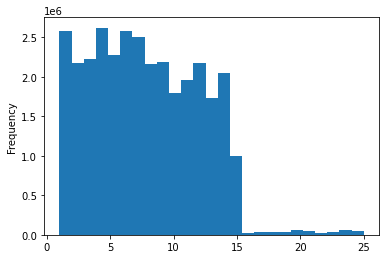

In [23]:
# Create new scatterplot with updated data
ords_prods_merged['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

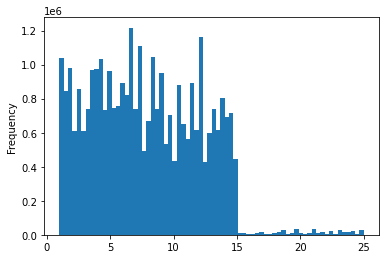

In [24]:
# Create histogram with more granularity
ords_prods_merged['prices'].plot.hist(bins = 70)

#### Export Histogram Outside Jupyter

In [25]:
# Export bar outside Jupyter
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

#### Creating Line Charts

##### Sampling Data

In [26]:
# Create list holding true/false values to test np.random 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [27]:
# Examine dev list
dev

array([False,  True, False, ...,  True,  True,  True])

Note: It appears as it should because it shows the values are less than or equal to 0.7, which is the desired value. The code creates a list.

In [28]:
# Illustrating random function
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

Split dataframe into two samples

In [29]:
# Store 70% of the sample in dataframe named "big"
big = ords_prods_merged[dev]

In [30]:
# Store 30% of the sample in dataframe named "small"
small = ords_prods_merged[~dev]

In [31]:
# Check sample subsets
len(ords_prods_merged)

32404859

In [32]:
len(big) + len(small)

32404859

The numbers from both lines of code match, which shows the sample sizes are accurate.

In [33]:
# Reduce size of sample to necessary columns
df_2 = small[['orders_day_of_week', 'prices']]

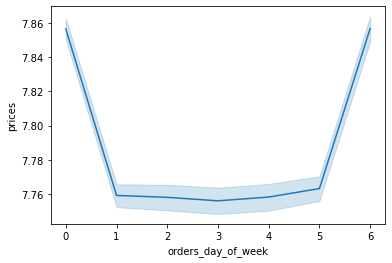

In [34]:
# Create line graph
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [35]:
# Create line graph from entire data set
df_4 = ords_prods_merged[['orders_day_of_week', 'prices']]